<a href="https://colab.research.google.com/github/lemarouane/Visualisation-of-Covid-19/blob/master/covid_19_marouane_haddad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Traitement et nettoyage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df=pd.read_csv('data.csv')
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
print("types des colonnes:" )
df.dtypes

types des colonnes:


Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [ ]:
print("dimensions : ",df.shape)
print("Valeurs manquantes : " , df.isnull().sum)

dimensions :  (187, 15)
Valeurs manquantes :  <bound method NDFrame._add_numeric_operations.<locals>.sum of      Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0             False      False   False      False   False      False   
1             False      False   False      False   False      False   
2             False      False   False      False   False      False   
3             False      False   False      False   False      False   
4             False      False   False      False   False      False   
..              ...        ...     ...        ...     ...        ...   
182           False      False   False      False   False      False   
183           False      False   False      False   False      False   
184           False      False   False      False   False      False   
185           False      False   False      False   False      False   
186           False      False   False      False   False      False   

     New deaths  New recove

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
df.isnull().any()

Country/Region            False
Confirmed                 False
Deaths                    False
Recovered                 False
Active                    False
New cases                 False
New deaths                False
New recovered             False
Deaths / 100 Cases        False
Recovered / 100 Cases     False
Deaths / 100 Recovered    False
Confirmed last week       False
1 week change             False
1 week % increase         False
WHO Region                False
dtype: bool

In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


<Axes: >

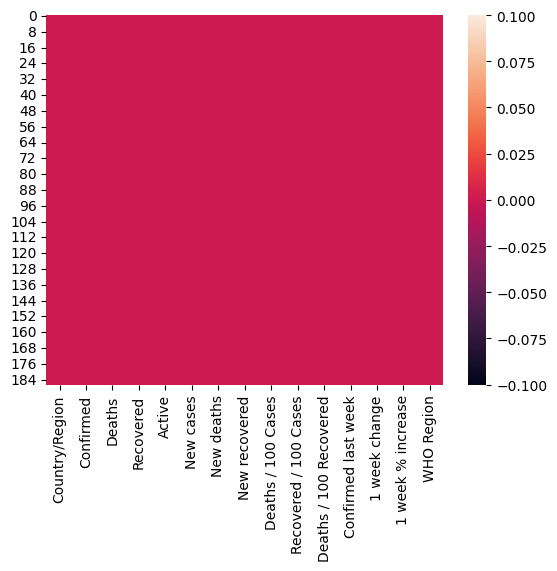

In [ ]:
sns.heatmap(df.isnull())

Il n'y a pas de valeurs manquantes , pas besoin de faire un nettoyage

#visualisation des données

Visualisation des données de Covid 19 Au maroc

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

morocco_data = df[df['Country/Region'] == 'Morocco']
morocco_data = morocco_data[['Confirmed', 'Deaths', 'Recovered']]
morocco_data = morocco_data.T
morocco_data.index = ['Confirmed', 'Deaths', 'Recovered']



Visualization

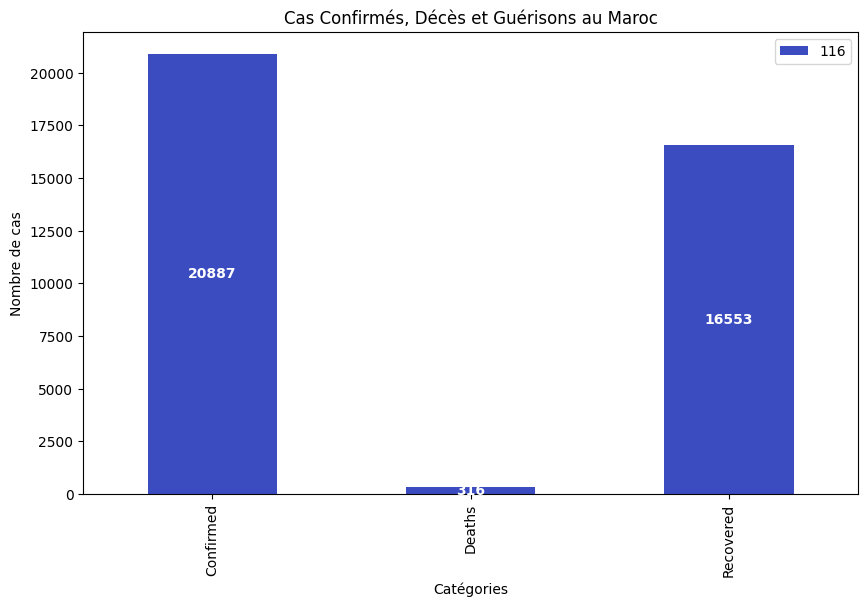

In [ ]:
colors = ["yellow", "red", "blue"]
ax = morocco_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title('Cas Confirmés, Décès et Guérisons au Maroc')
plt.xlabel('Catégories')
plt.ylabel('Nombre de cas')

for i, (colname, color) in enumerate(zip(morocco_data.columns, colors)):
    for j, value in enumerate(morocco_data[colname]):
        ax.text(j, value / 2, f'{value:.0f}', ha='center', va='center', color='white', fontweight='bold')

plt.show()



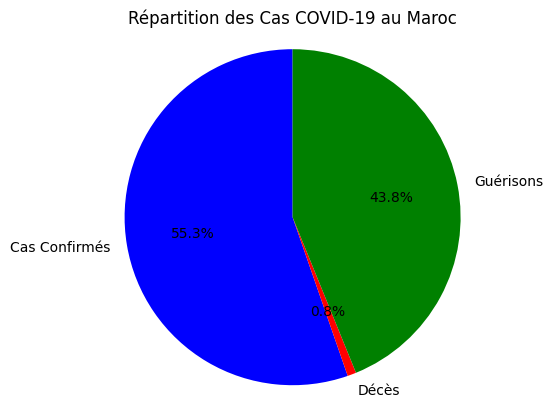

In [ ]:

morocco_data = df[df['Country/Region'] == 'Morocco']
confirmed_cases = morocco_data['Confirmed'].values[0]
deaths = morocco_data['Deaths'].values[0]
recovered = morocco_data['Recovered'].values[0]

labels = ['Cas Confirmés', 'Décès', 'Guérisons']
sizes = [confirmed_cases, deaths, recovered]
colors = ['blue', 'red', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des Cas COVID-19 au Maroc')
plt.axis('equal')
plt.show()


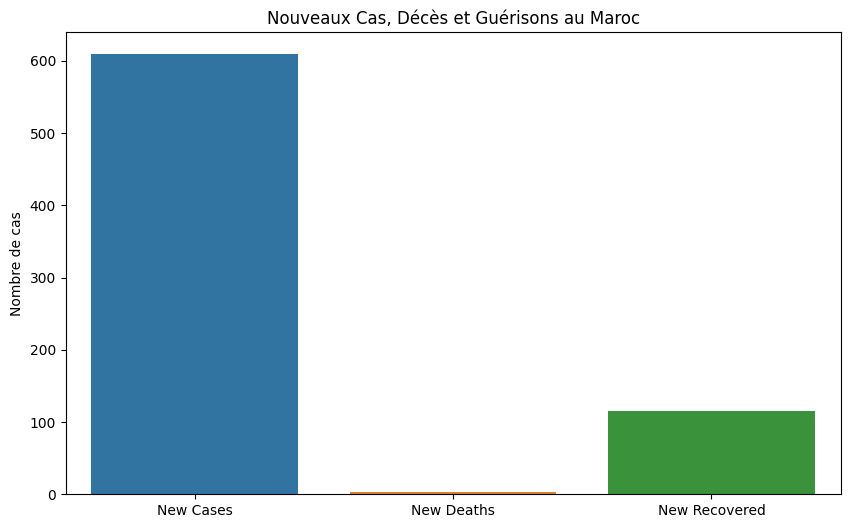

In [ ]:

new_cases = morocco_data['New cases'].values[0]
new_deaths = morocco_data['New deaths'].values[0]
new_recovered = morocco_data['New recovered'].values[0]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=['New Cases', 'New Deaths', 'New Recovered'], y=[new_cases, new_deaths, new_recovered], ax=ax)
plt.title('Nouveaux Cas, Décès et Guérisons au Maroc')
plt.ylabel('Nombre de cas')
plt.show()

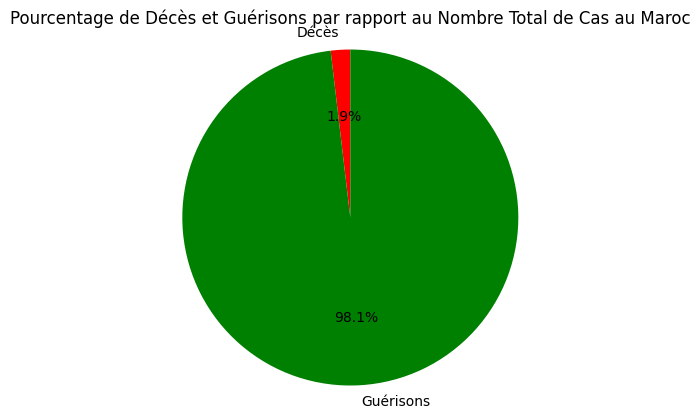

In [ ]:

deaths_percent = morocco_data['Deaths / 100 Cases'].values[0]
recovered_percent = morocco_data['Recovered / 100 Cases'].values[0]

labels = ['Décès', 'Guérisons']
sizes = [deaths_percent, recovered_percent]
colors = ['red', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Pourcentage de Décès et Guérisons par rapport au Nombre Total de Cas au Maroc')
plt.axis('equal')
plt.show()


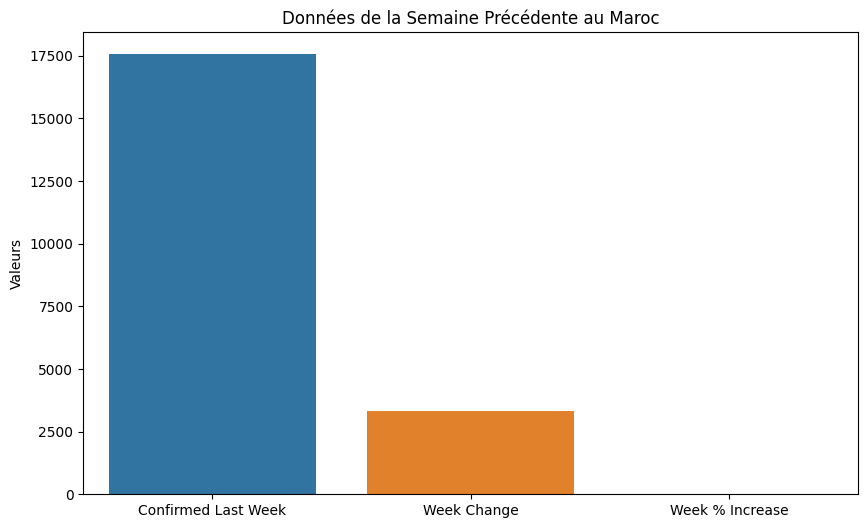

In [ ]:
# Sélectionner les colonnes d'intérêt
confirmed_last_week = morocco_data['Confirmed last week'].values[0]
week_change = morocco_data['1 week change'].values[0]
week_increase_percent = morocco_data['1 week % increase'].values[0]

# Créer un diagramme en barres
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=['Confirmed Last Week', 'Week Change', 'Week % Increase'],
            y=[confirmed_last_week, week_change, week_increase_percent], ax=ax)
plt.title('Données de la Semaine Précédente au Maroc')
plt.ylabel('Valeurs')
plt.show()


#Afficher la tendance mondiale selon les pays

cas confirmés

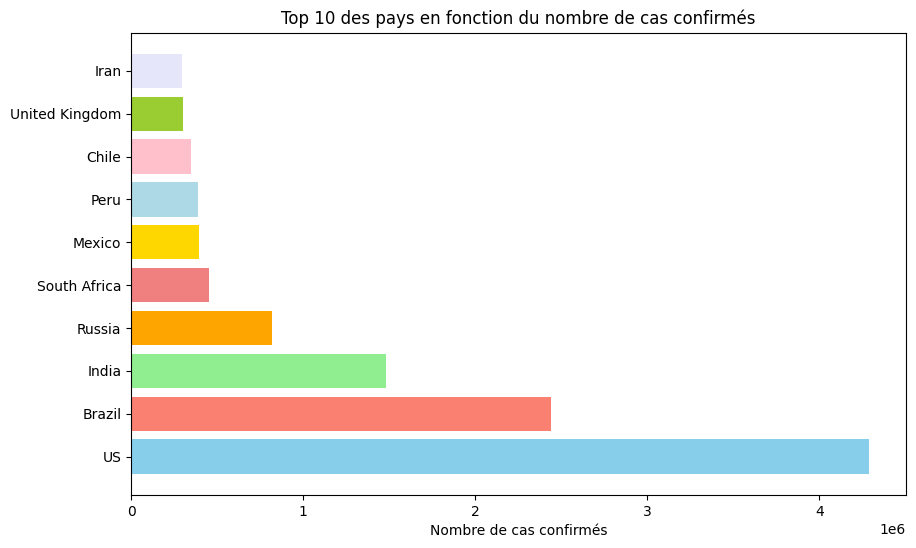

In [ ]:
import matplotlib.pyplot as plt


top_10_countries = df.sort_values(by='Confirmed', ascending=False).head(10)
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'gold', 'lightblue', 'pink', 'yellowgreen', 'lavender']

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_countries['Country/Region'], top_10_countries['Confirmed'], color=colors)
ax.set_xlabel('Nombre de cas confirmés')
ax.set_title('Top 10 des pays en fonction du nombre de cas confirmés')


plt.show()


les décés

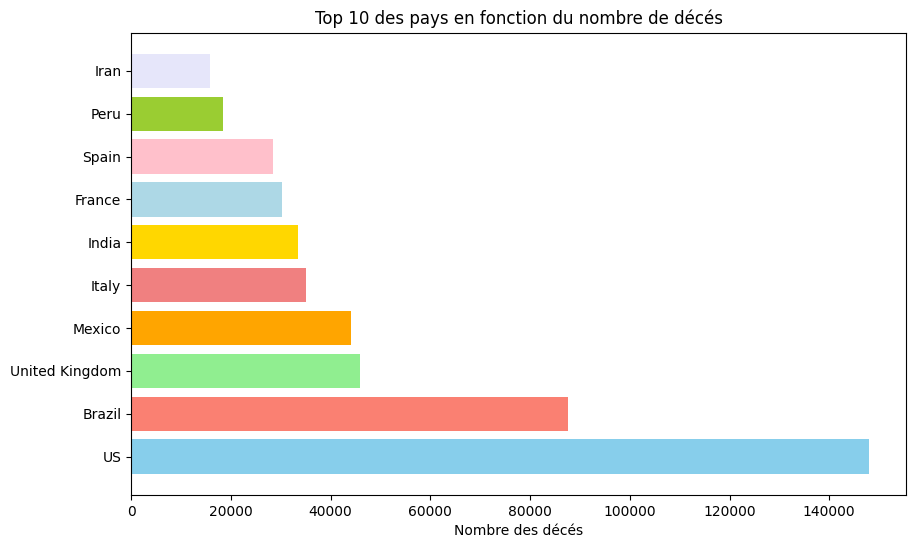

In [ ]:
import matplotlib.pyplot as plt


top_10_countries = df.sort_values(by='Deaths', ascending=False).head(10)
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'gold', 'lightblue', 'pink', 'yellowgreen', 'lavender']

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_countries['Country/Region'], top_10_countries['Deaths'], color=colors)
ax.set_xlabel('Nombre des décés')
ax.set_title('Top 10 des pays en fonction du nombre de décés')


plt.show()


les guérissons

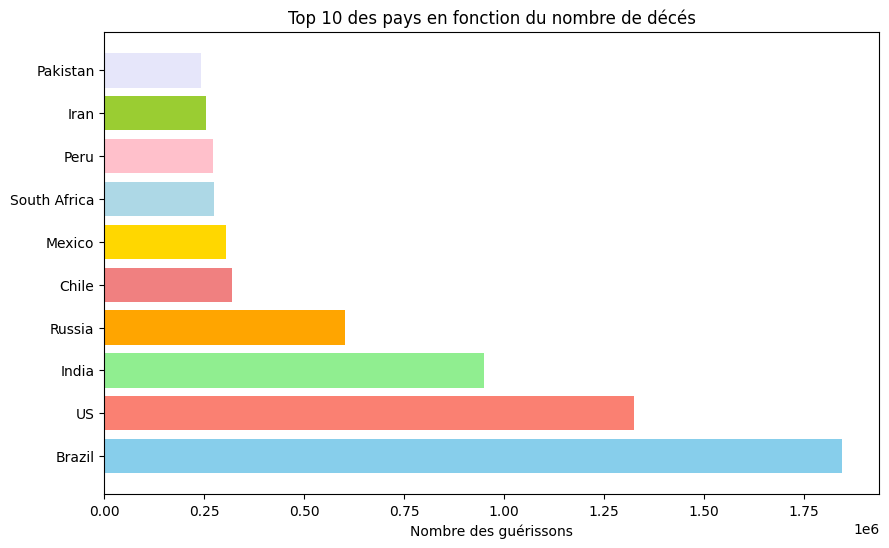

In [ ]:
import matplotlib.pyplot as plt


top_10_countries = df.sort_values(by='Recovered', ascending=False).head(10)
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'gold', 'lightblue', 'pink', 'yellowgreen', 'lavender']

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_countries['Country/Region'], top_10_countries['Recovered'], color=colors)
ax.set_xlabel('Nombre des guérissons')
ax.set_title('Top 10 des pays en fonction du nombre de décés')


plt.show()

#Afficher la tendance mondiale selon les pays

visualiser la répartition des cas COVID-19 selon les continents

<ipython-input-66-0c2e150a9afb>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Confirmed', y='WHO Region', data=df, ci=None)


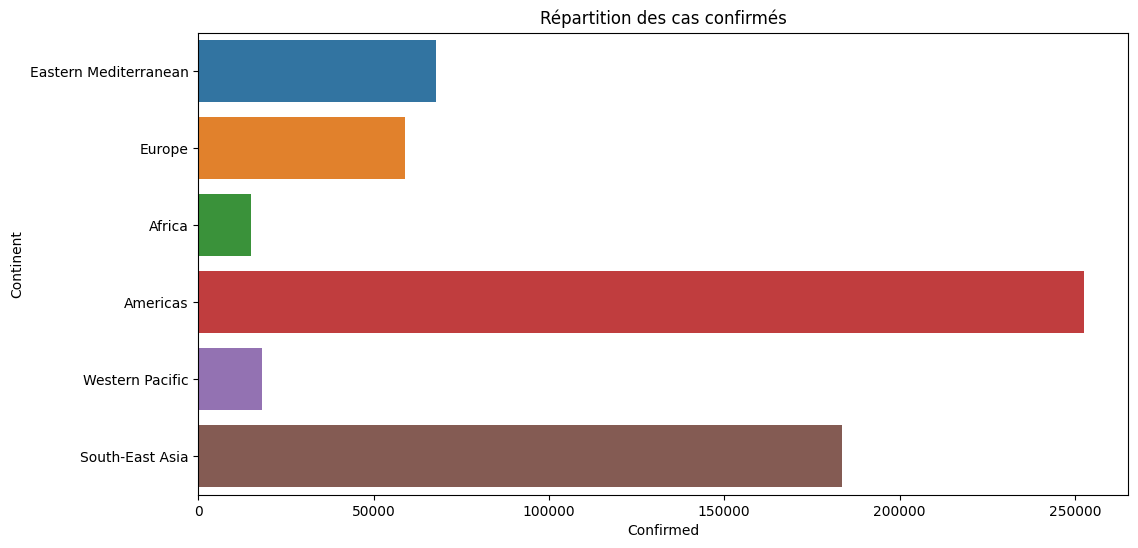

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='WHO Region', data=df, ci=None)

plt.title('Répartition des cas confirmés')
plt.ylabel('Continent')

plt.show()

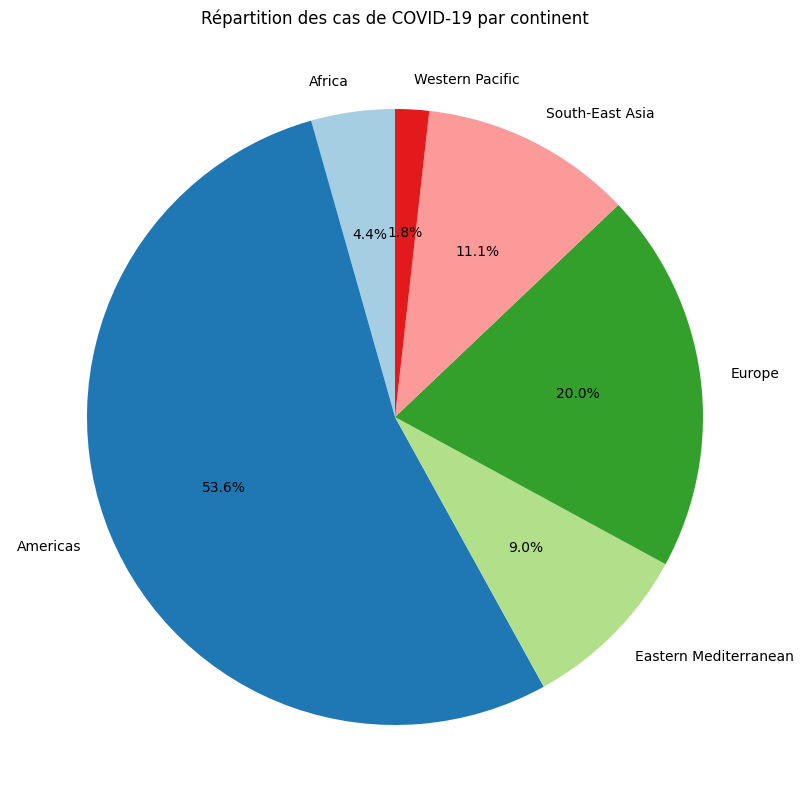

In [ ]:

cases_by_continent = df.groupby('WHO Region')['Confirmed'].sum()
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(cases_by_continent, labels=cases_by_continent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Répartition des cas de COVID-19 par continent')
plt.show()


visualiser la répartition des guérissons selon les continents

<ipython-input-68-0c06bdb5679c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Recovered', y='WHO Region', data=df, ci=None)


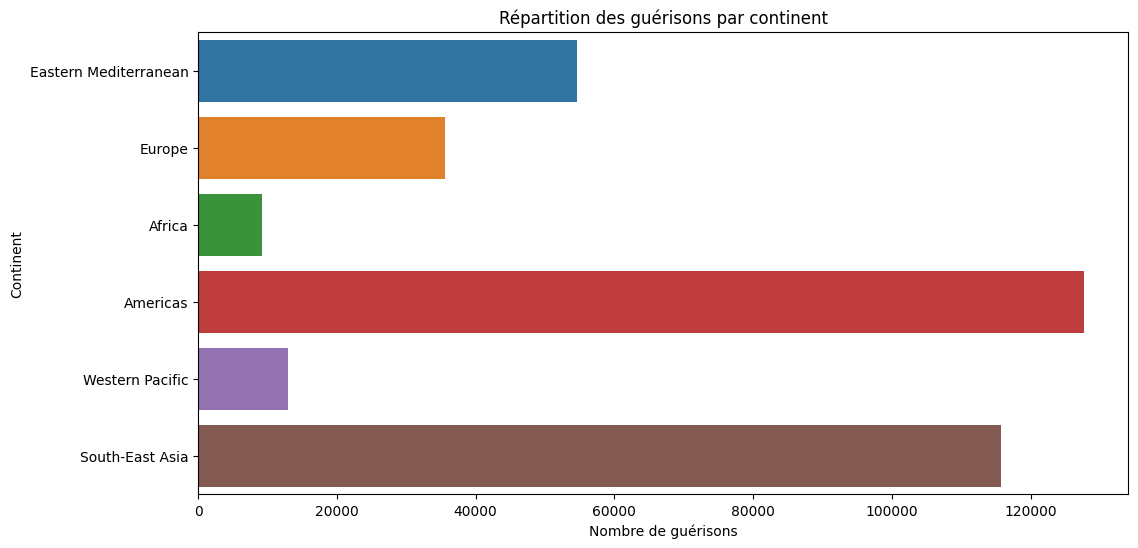

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Recovered', y='WHO Region', data=df, ci=None)

plt.title('Répartition des guérisons par continent')
plt.xlabel('Nombre de guérisons')
plt.ylabel('Continent')

plt.show()


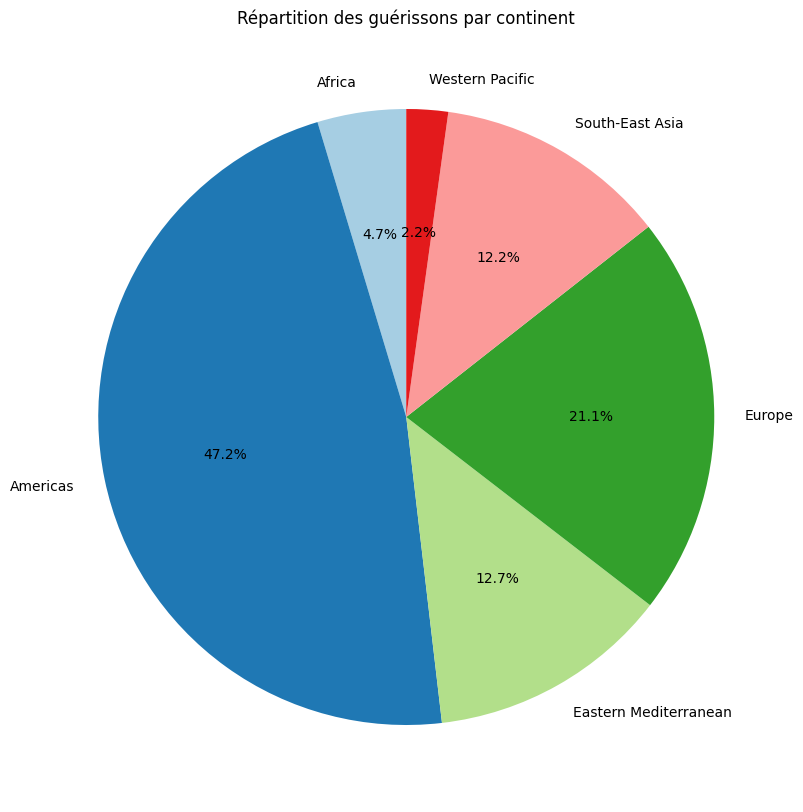

In [ ]:

cases_by_continent = df.groupby('WHO Region')['Recovered'].sum()
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(cases_by_continent, labels=cases_by_continent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Répartition des guérissons par continent')
plt.show()

visualiser la répartition des décés selon les continents

<ipython-input-70-cafa1a28ccb2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Deaths', y='WHO Region', data=df, ci=None)


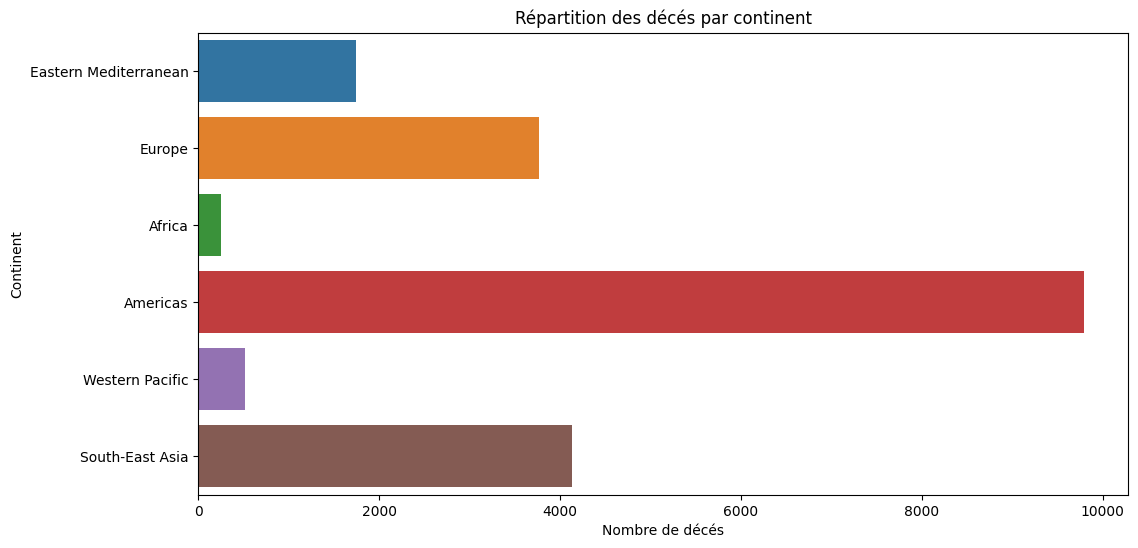

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Deaths', y='WHO Region', data=df, ci=None)

plt.title('Répartition des décés par continent')
plt.xlabel('Nombre de décés')
plt.ylabel('Continent')

plt.show()

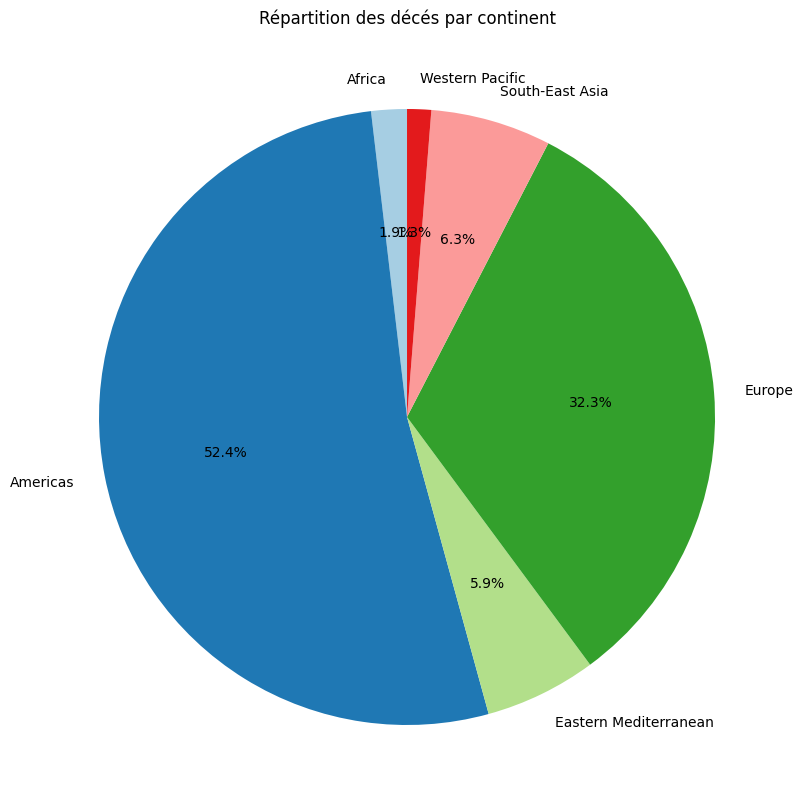

In [ ]:

cases_by_continent = df.groupby('WHO Region')['Deaths'].sum()
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(cases_by_continent, labels=cases_by_continent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Répartition des décés par continent')
plt.show()

#Plot dynamique des cas confirmés , décés, recovered par pays
## Cas Afrique :

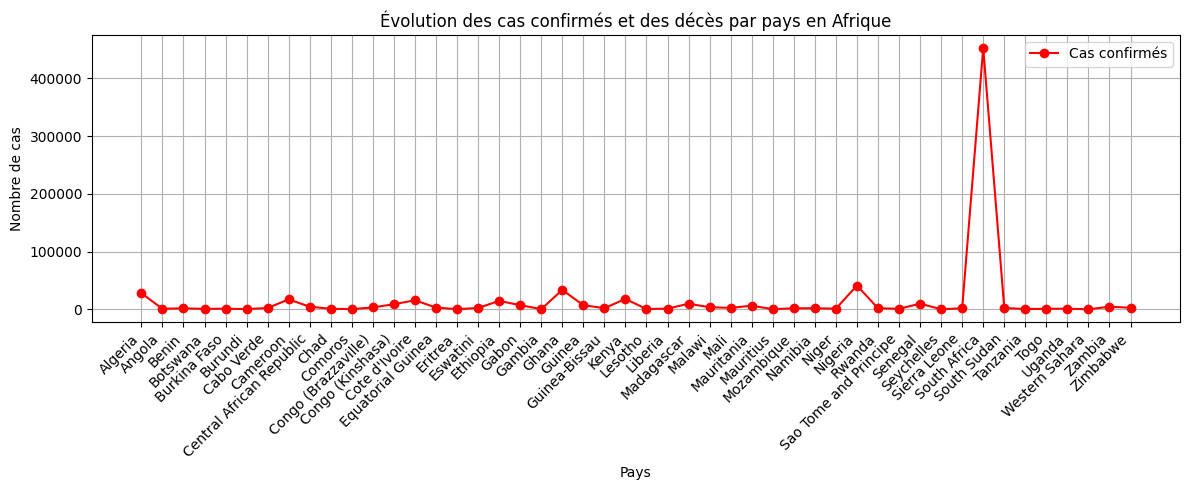

In [ ]:
continent = df[df['WHO Region'] == 'Africa']

plt.figure(figsize=(12, 5))
plt.plot(continent['Country/Region'], continent['Confirmed'], marker='o', linestyle='-', color='r', label='Cas confirmés')
plt.title('Évolution des cas confirmés et des décès par pays en Afrique')
plt.xlabel('Pays')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

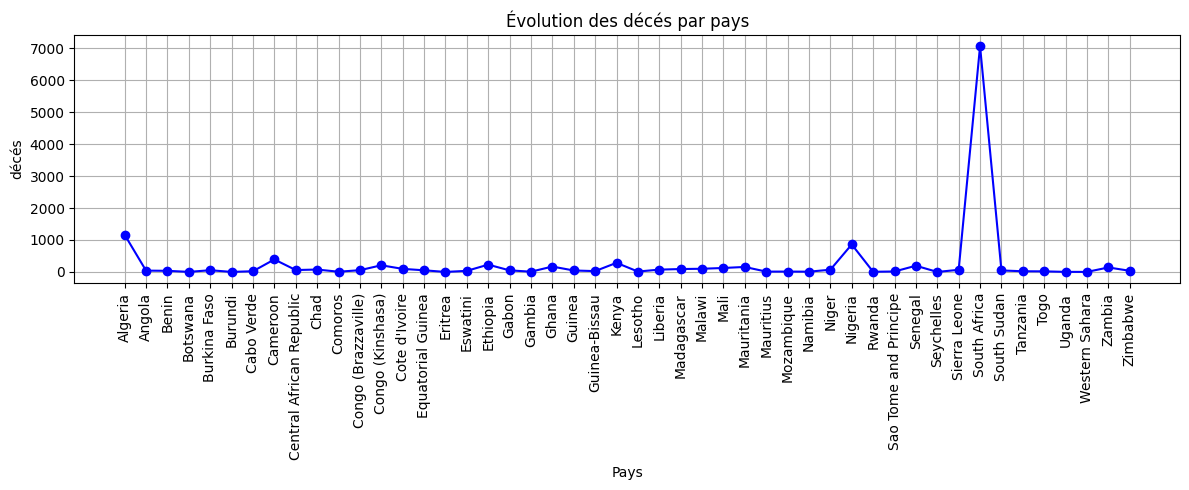

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(continent['Country/Region'], continent['Deaths'], marker='o', linestyle='-', color='b')
plt.title('Évolution des décés par pays')
plt.xlabel('Pays')
plt.ylabel('décés')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

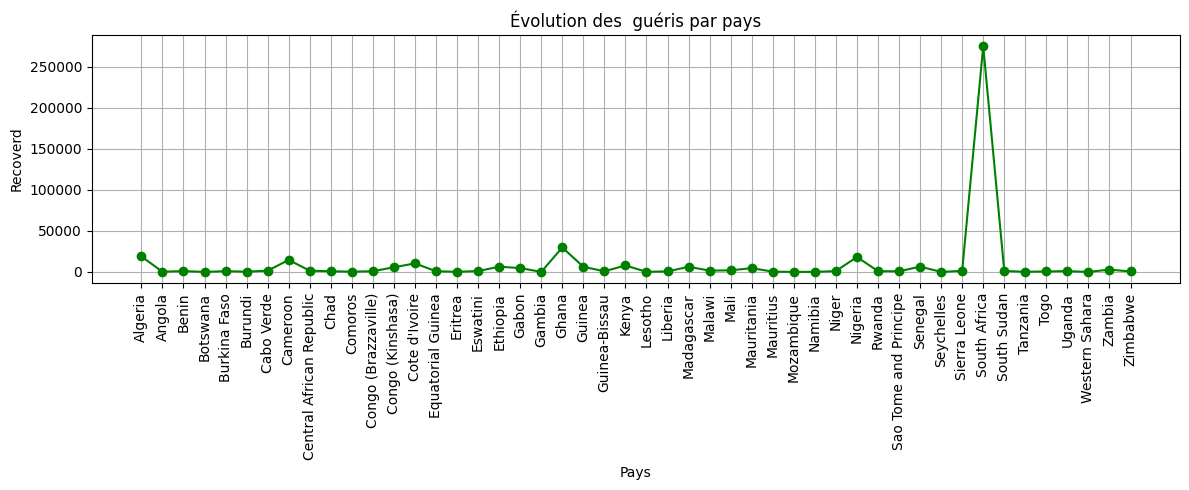

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(continent['Country/Region'], continent['Recovered'], marker='o', linestyle='-', color='g')
plt.title('Évolution des  guéris par pays')
plt.xlabel('Pays')
plt.ylabel('Recoverd')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Cas Eastern **Mediterranean**

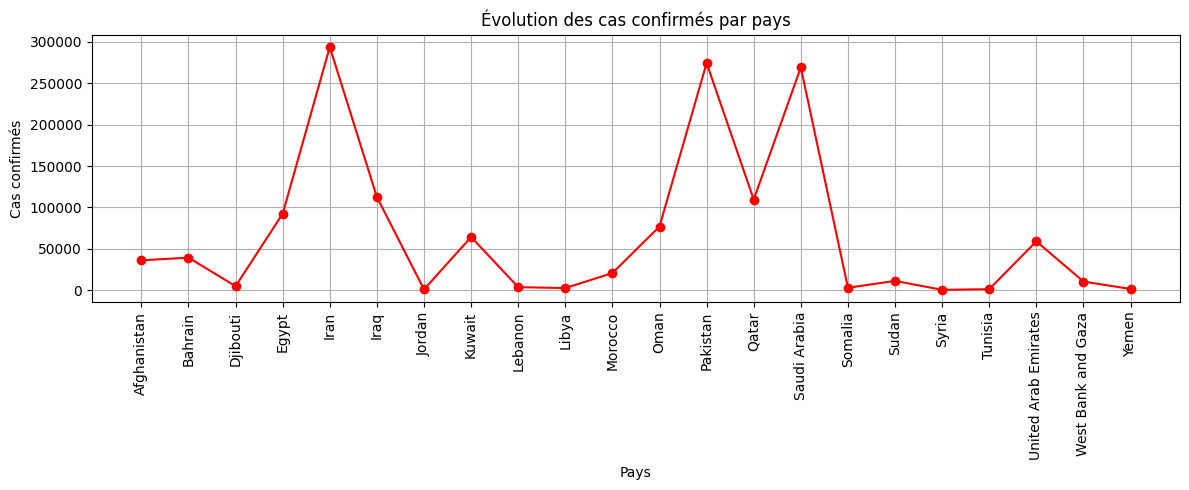

In [ ]:
plt.figure(figsize=(12,5))
continent_=df[df['WHO Region'] == 'Eastern Mediterranean']
plt.plot(continent_['Country/Region'], continent_['Confirmed'], marker='o', linestyle='-', color='r')
plt.title('Évolution des cas confirmés par pays')
plt.xlabel('Pays')
plt.ylabel('Cas confirmés')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

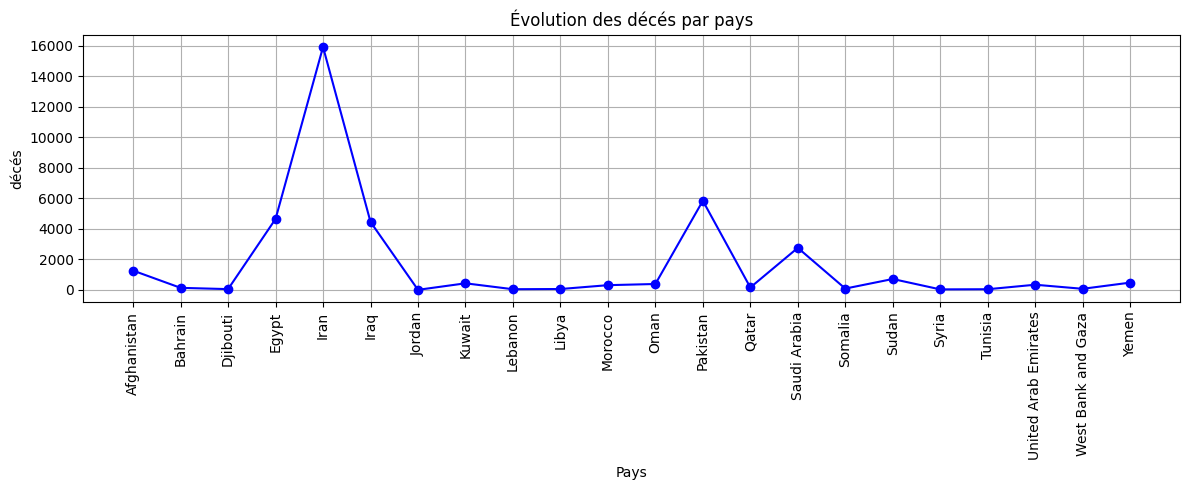

In [ ]:
plt.figure(figsize=(12,5))
continent_=df[df['WHO Region'] == 'Eastern Mediterranean']
plt.plot(continent_['Country/Region'], continent_['Deaths'], marker='o', linestyle='-', color='b')
plt.title('Évolution des décés par pays')
plt.xlabel('Pays')
plt.ylabel('décés')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

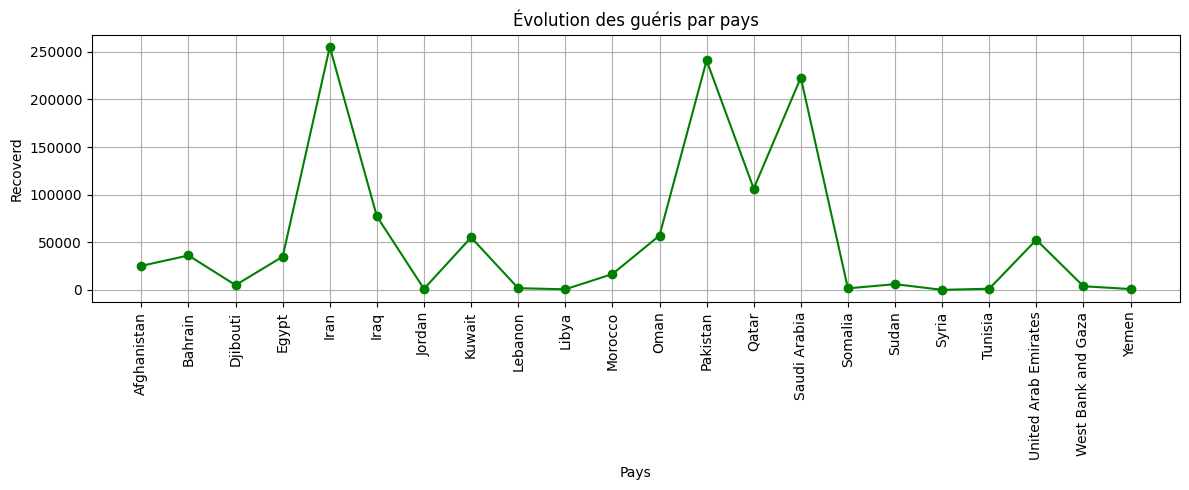

In [ ]:
plt.figure(figsize=(12,5))
continent_=df[df['WHO Region'] == 'Eastern Mediterranean']
plt.plot(continent_['Country/Region'], continent_['Recovered'], marker='o', linestyle='-', color='g')
plt.title('Évolution des guéris par pays')
plt.xlabel('Pays')
plt.ylabel('Recoverd')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-78-44edbee75dd8>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


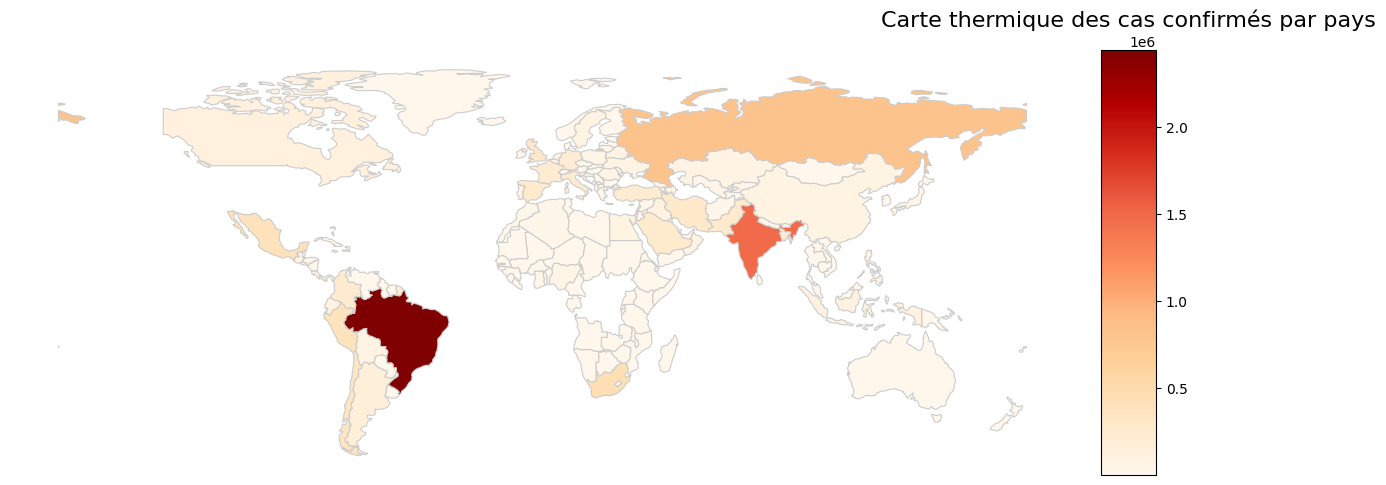

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(df, left_on='name', right_on='Country/Region')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged.plot(column='Confirmed', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)


plt.title('Carte thermique des cas confirmés par pays', fontsize=16)
ax.set_axis_off()
plt.show()


<ipython-input-81-b2626363bb8d>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


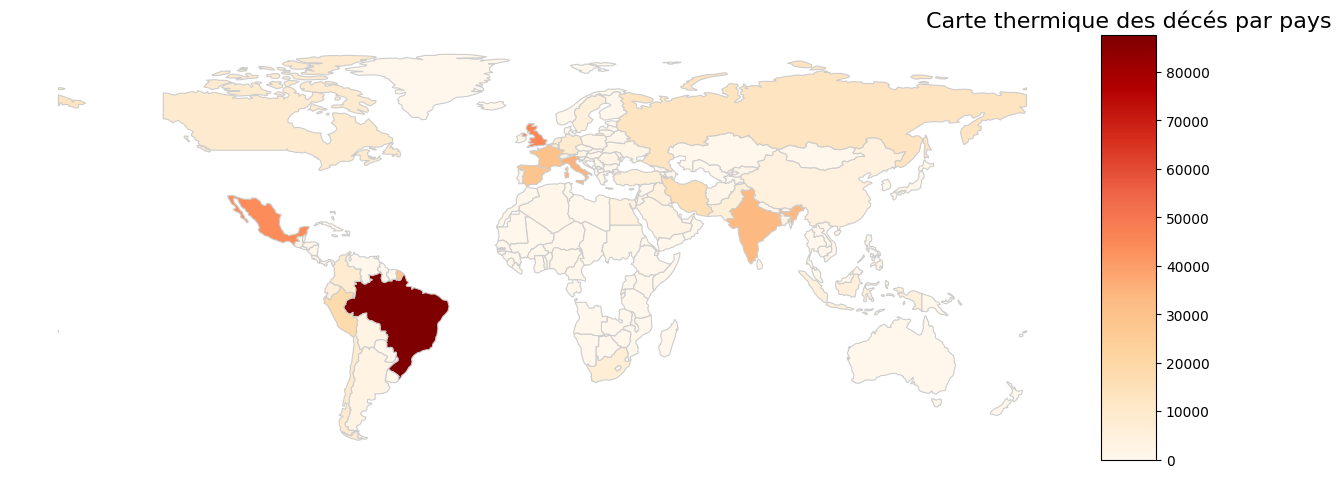

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(df, left_on='name', right_on='Country/Region')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)


plt.title('Carte thermique des décés par pays', fontsize=16)
ax.set_axis_off()
plt.show()


<ipython-input-83-16b3ff3e66f5>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


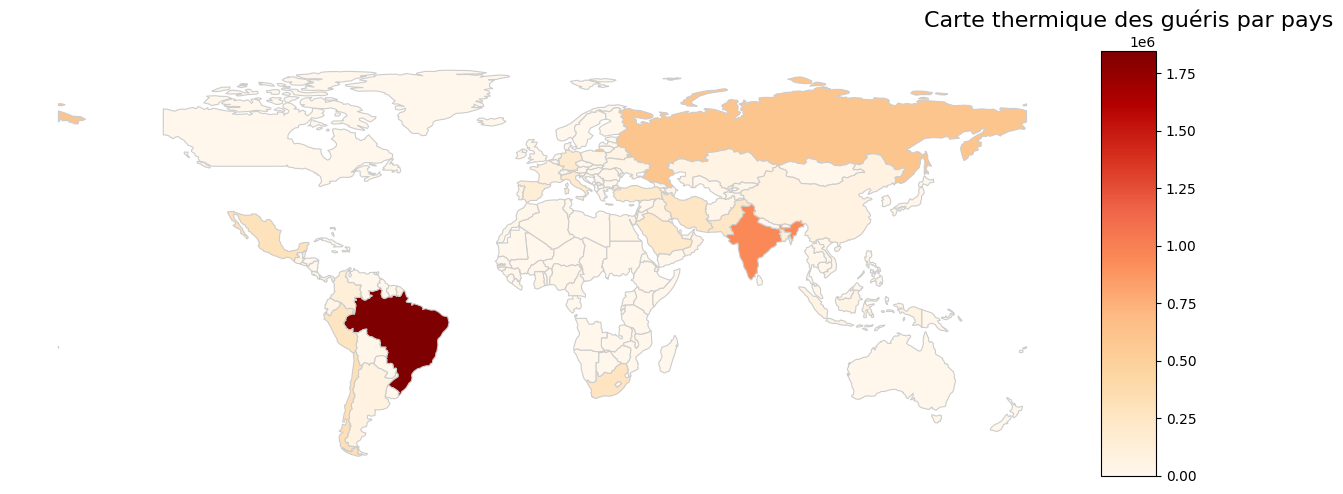

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(df, left_on='name', right_on='Country/Region')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged.plot(column='Recovered', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)


plt.title('Carte thermique des guéris par pays', fontsize=16)
ax.set_axis_off()
plt.show()
